# TSFresh exploration

In [1]:
from tsfresh import select_features, extract_relevant_features, extract_features
from tsfresh.utilities.dataframe_functions import impute
from get_processed_data import get_processed_data, get_train_test_split
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from tsfresh.transformers import RelevantFeatureAugmenter
from sklearn.metrics import classification_report


In [2]:
train_test_split  = get_train_test_split(
  'malte', 60 * 1, 60*0 # 5 second window, 2s overlap
)

In [3]:

ts_train = []
y_train = pd.Series() # 0 = not hard, 1 = hard
i = 0

ts_test = []
y_test = pd.Series() # 0 = not hard, 1 = hard


for split_i, split in enumerate(train_test_split):
  for difficulty, windows in split.items():
    for window in windows:
      data  = pd.DataFrame(window)
      data = data.drop("PacketCounter", axis=1)
      data["id"] = i
      if split_i == 0:
        ts_train.append(data)
        y_train[i] = difficulty == "hard"
      else:
        ts_test.append(data)
        y_test[i] = difficulty == "hard"
      i += 1

df_ts_train = pd.concat(ts_train)
df_ts_test = pd.concat(ts_test)


In [4]:
X_test = pd.DataFrame(index=y_test.index)
X_test_unbalanced = pd.DataFrame(index=y_test.index)
X_train = pd.DataFrame(index=y_train.index)
X_train_unbalanced = pd.DataFrame(index=y_train.index)

In [10]:
ppl_unbalanced = Pipeline([
            ('augmenter', RelevantFeatureAugmenter(column_id='id', column_sort='SampleTimeFine', column_kind=None, column_value=None)),
            ('classifier', RandomForestClassifier()),
            ])
ppl_unbalanced.set_params(augmenter__timeseries_container=df_ts_train)
ppl_unbalanced.fit(X_train_unbalanced, y_train)

Feature Extraction: 100%|██████████| 20/20 [01:46<00:00,  5.33s/it]
/Users/malte/Developer/data-science-for-wearables/.venv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['Quat_Z__fft_coefficient__attr_"real"__coeff_31'
 'Quat_Z__fft_coefficient__attr_"real"__coeff_32'
 'Quat_Z__fft_coefficient__attr_"real"__coeff_33' ...
 'Quat_Y__fft_coefficient__attr_"angle"__coeff_98'
 'Quat_Y__fft_coefficient__attr_"angle"__coeff_99'
 'Quat_Y__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


Pipeline(steps=[('augmenter',
                 RelevantFeatureAugmenter(column_id='id',
                                          column_sort='SampleTimeFine',
                                          timeseries_container=    SampleTimeFine    Quat_W    Quat_X    Quat_Y    Quat_Z  FreeAcc_X  \
0                0  0.810841  0.198744  0.136467 -0.533313  -0.018069   
1            16667  0.811080  0.198380  0.135855 -0.533242   0.136214   
2            33334  0.811371  0.197772  0.135500 -0.533115   0.340523   
3            50001  0.811737  0.196823  0.135474 -0.532915   0.4563...
59       101985373  0.422027  0.608400 -0.459606  0.490421   0.160574   

    FreeAcc_Y  FreeAcc_Z    id  
0   -0.214065   0.148417     0  
1   -0.373040  -0.007256     0  
2   -0.459667  -0.135375     0  
3   -0.452044  -0.139472     0  
4   -0.495046   0.041724     0  
..        ...        ...   ...  
55   0.086218   0.181858  1552  
56   0.080905   0.114705  1552  
57  -0.035897  -0.014828  1552  
58   0.189323   0.084782  1552  
59   0.087520   0.040563  1552  

[93180 rows x 9 columns])),
                ('classifier', RandomForestClassifier())])

In [6]:
ppl = Pipeline([
            ('augmenter', RelevantFeatureAugmenter(column_id='id', column_sort='SampleTimeFine', column_kind=None, column_value=None)),
            ('classifier', RandomForestClassifier(class_weight="balanced")),
            ])
ppl.set_params(augmenter__timeseries_container=df_ts_train)
ppl.fit(X_train, y_train)

Feature Extraction: 100%|██████████| 20/20 [01:49<00:00,  5.46s/it]
/Users/malte/Developer/data-science-for-wearables/.venv/lib/python3.12/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['FreeAcc_Y__fft_coefficient__attr_"real"__coeff_31'
 'FreeAcc_Y__fft_coefficient__attr_"real"__coeff_32'
 'FreeAcc_Y__fft_coefficient__attr_"real"__coeff_33' ...
 'FreeAcc_X__fft_coefficient__attr_"angle"__coeff_98'
 'FreeAcc_X__fft_coefficient__attr_"angle"__coeff_99'
 'FreeAcc_X__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


Pipeline(steps=[('augmenter',
                 RelevantFeatureAugmenter(column_id='id',
                                          column_sort='SampleTimeFine',
                                          timeseries_container=    SampleTimeFine    Quat_W    Quat_X    Quat_Y    Quat_Z  FreeAcc_X  \
0                0  0.810841  0.198744  0.136467 -0.533313  -0.018069   
1            16667  0.811080  0.198380  0.135855 -0.533242   0.136214   
2            33334  0.811371  0.197772  0.135500 -0.533115   0.340523   
3            50001  0.811737  0.196823  0.135474 -0.532915   0.4563...
59       101985373  0.422027  0.608400 -0.459606  0.490421   0.160574   

    FreeAcc_Y  FreeAcc_Z    id  
0   -0.214065   0.148417     0  
1   -0.373040  -0.007256     0  
2   -0.459667  -0.135375     0  
3   -0.452044  -0.139472     0  
4   -0.495046   0.041724     0  
..        ...        ...   ...  
55   0.086218   0.181858  1552  
56   0.080905   0.114705  1552  
57  -0.035897  -0.014828  1552  
58   0.189323   0.084782  1552  
59   0.087520   0.040563  1552  

[93180 rows x 9 columns])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced'))])

In [7]:
ppl.set_params(augmenter__timeseries_container=df_ts_test)
ppl_unbalanced.set_params(augmenter__timeseries_container=df_ts_test)
y_pred = ppl.predict(X_test)
y_pred_unbalanced = ppl_unbalanced.predict(X_test_unbalanced)

Feature Extraction: 100%|██████████| 20/20 [00:09<00:00,  2.05it/s]


In [8]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix

print("Binary Tree, Unbalanced class weights")
print("Accuracy:", accuracy_score(y_test, y_pred_unbalanced))
print("Balanced Accuracy:",balanced_accuracy_score(y_test, y_pred_unbalanced))
print(confusion_matrix(y_test, y_pred_unbalanced))

print("Binary Tree, Balanced class weights")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy ",balanced_accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))






# print(accuracy_score(y_test, y_pred))


# print(balanced_accuracy_score(y_test, y_pred))

# plot 

Binary Tree, Unbalanced class weights
Accuracy: 0.7553191489361702
Balanced Accuracy: 0.7156071061518132
[[ 31  18]
 [ 28 111]]
Binary Tree, Balanced class weights
Accuracy: 0.7553191489361702
Balanced Accuracy  0.7288210248128029
[[ 33  16]
 [ 30 109]]


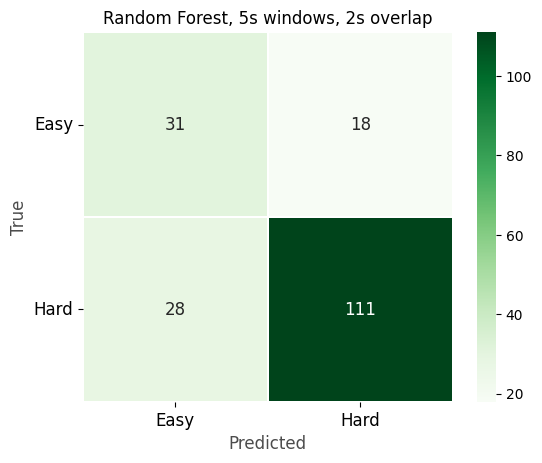

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# plot confusion matrix

matrix = confusion_matrix(y_test, y_pred_unbalanced)
# matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure()
# sns.set_theme(font_scale=1)
sns.heatmap(matrix, annot=True, annot_kws={'size':12},
            cmap=plt.cm.Greens, linewidths=0.2, fmt='g', square=True)

#fontsize
plt.yticks(fontsize=12)

# increase spacing

# Add labels to the plot
class_names = ['Easy', 'Hard']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks2, class_names, rotation=0, fontsize=12)
plt.yticks(tick_marks2, class_names, rotation=0, fontsize=12)
plt.xlabel('Predicted', fontsize=12, alpha=0.7)
plt.ylabel('True', fontsize=12, alpha=0.7)
plt.title('Random Forest, 5s windows, 2s overlap')
plt.savefig('exports/confusion_matrix_unbalanced_5s_2s.png', dpi=300)
plt.show()


In [12]:
print(classification_report(y_test, y_pred_unbalanced))

              precision    recall  f1-score   support

       False       0.53      0.63      0.57        49
        True       0.86      0.80      0.83       139

    accuracy                           0.76       188
   macro avg       0.69      0.72      0.70       188
weighted avg       0.77      0.76      0.76       188

